In [1]:
import numpy as np
import os
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
train = np.zeros((1,64,64,3))

In [11]:
img_folder = './SCUT-FBP5500_v2/Images/'
train_img_list = []
y_train = []

In [5]:
files = './SCUT-FBP5500_v2/train_test_files/5_folders_cross_validations_files/cross_validation_1/test_1.txt'

In [12]:
with open(files, 'rt') as imgnames:
    for line in imgnames:
        img, score = line.strip().split(' ')
        train_img_list.append(img)
        y_train.append(float(score))

In [7]:
for imgname in train_img_list[:1000]:
    img = cv2.imread(os.path.join(img_folder, imgname))
    img = cv2.resize(img, (224,224))
    img = np.array(img).reshape(1,224,244,3)/255.0
    train = np.append(train, img, axis=0)

In [8]:
train = train[1:]

In [13]:
y_train = np.array(y_train[:1000]).reshape(-1,1)

In [14]:
train.shape[0]==y_train.shape[0]

True

In [15]:
#Import library
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [46]:
# import library
from keras.models import Sequential,Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from IPython.display import Image
from keras.optimizers import Adam

In [48]:
# # AlexNet
# #Instantiate an empty model
# model = Sequential()

# # 1st Convolutional Layer
# model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
# model.add(Activation('relu'))
# # Max Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# # 2nd Convolutional Layer
# model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))
# # Max Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# # 3rd Convolutional Layer
# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))

# # 4th Convolutional Layer
# model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))

# # 5th Convolutional Layer
# model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))
# # Max Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# # Passing it to a Fully Connected layer
# model.add(Flatten())
# # 1st Fully Connected Layer
# model.add(Dense(4096, input_shape=(224*224*3,)))
# model.add(Activation('relu'))
# # Add Dropout to prevent overfitting
# model.add(Dropout(0.4))

# # 2nd Fully Connected Layer
# model.add(Dense(4096))
# model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.4))

# # 3rd Fully Connected Layer
# model.add(Dense(1000))
# model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.4))

# # Output Layer
# model.add(Dense(17))
# model.add(Activation('softmax'))

# model.summary()

In [41]:
# Create model 
model = Sequential()
# Add convolution 2D shape (5x5x32),padding same, stride=1)
model.add(
    Conv2D(filters=4, kernel_size=(7,7), padding='same', strides=(2, 2), 
           activation='relu', input_shape=(64,64,3), name='CONV_1'    
    )
)
# Add Max_pooling 2D kernel size(2,2),no padding, stride=2
model.add(MaxPooling2D( pool_size=(2,2), strides=(2,2), padding='valid', name="MAX_POOL_1"))

# Add convolution 2D shape (3x3x64),padding same, stride=1 
model.add(
    Conv2D(filters=8, kernel_size=(5,5), padding='same', strides=(2, 2), activation='relu', name='CONV_2')
)

# Add Max_pooling 2D kernel size(2,2)
model.add( MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name="MAX_POOL_2"))

# ADD flatten
model.add(Flatten(name="FLATTEN"))

# ADD dense layer 512 hidden unit
model.add(Dense(units=32, activation='relu', name="Dense_1"))

# ADD dense layer
model.add(Dense( units=1, name="Dense_2", activation='relu'))

In [42]:
optimizer = Adam(lr=1e-4)

# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Summary model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CONV_1 (Conv2D)              (None, 32, 32, 4)         592       
_________________________________________________________________
MAX_POOL_1 (MaxPooling2D)    (None, 16, 16, 4)         0         
_________________________________________________________________
CONV_2 (Conv2D)              (None, 8, 8, 8)           808       
_________________________________________________________________
MAX_POOL_2 (MaxPooling2D)    (None, 4, 4, 8)           0         
_________________________________________________________________
FLATTEN (Flatten)            (None, 128)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
Dense_2 (Dense)              (None, 1)                 33        
Total para

In [43]:
his = model.fit(x=train, y=np.array(y_train).reshape(-1,1), epochs=20)

Epoch 1/20
1000/1000 [==============================] - 4s 4ms/step - loss: 9.3433
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 9.3433
Epoch 3/20
1000/1000 [==============================] - 2s 2ms/step - loss: 9.3433
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/step - loss: 9.3433
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/step - loss: 9.3433
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 9.3433
Epoch 7/20
1000/1000 [==============================] - 2s 2ms/step - loss: 9.3433
Epoch 8/20
1000/1000 [==============================] - 3s 3ms/step - loss: 9.3433
Epoch 9/20
1000/1000 [==============================] - 2s 2ms/step - loss: 9.3433
Epoch 10/20
1000/1000 [==============================] - 3s 3ms/step - loss: 9.3433
Epoch 11/20
1000/1000 [==============================] - 2s 2ms/step - loss: 9.3433
Epoch 12/20
1000/1000 [==============================] - 2s 2ms/step - loss: 9.3433
E

In [21]:
import matplotlib.pyplot as plt

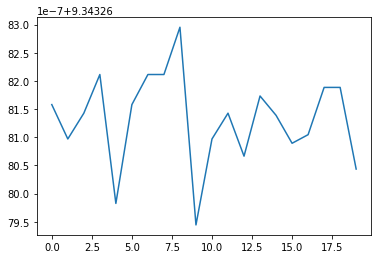

In [49]:
plt.plot(his.history['loss'])

In [25]:
y_pred = model.predict(train)

In [36]:
((y_train-y_pred)**2).mean()

0.30780924177798863

In [32]:
((y_train-y_pred)**2).argmax(axis=0)

array([797])

In [33]:
y_train[797]

array([1.75])

In [34]:
y_pred[797]

array([3.651327], dtype=float32)